<a href="https://colab.research.google.com/github/SuryARavichan/scikit-learn/blob/main/scikit_learn_business_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df = pd.read_csv('StudentsPerformance.csv')

In [8]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


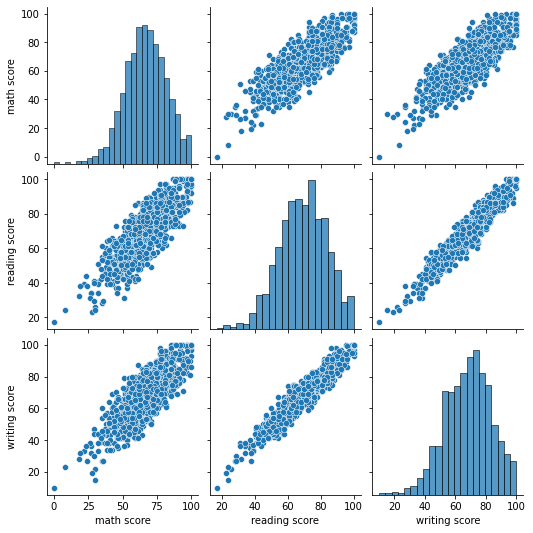

In [12]:
sns.pairplot(df)

In [18]:
x = df.drop('math score',axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [21]:
y = df['reading score']
y

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading score, Length: 1000, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [29]:
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
290,male,group C,associate's degree,standard,none,70,68
167,female,group B,master's degree,free/reduced,completed,76,78
486,male,group D,some college,free/reduced,none,47,56
683,female,group C,some high school,free/reduced,completed,40,44
876,male,group D,some college,standard,none,82,84
...,...,...,...,...,...,...,...
575,male,group A,associate's degree,free/reduced,completed,55,53
838,male,group B,associate's degree,free/reduced,completed,57,53
337,male,group C,associate's degree,standard,none,51,43
523,male,group C,master's degree,free/reduced,none,59,50


In [31]:
y_train

290    70
167    76
486    47
683    40
876    82
       ..
575    55
838    57
337    51
523    59
863    71
Name: reading score, Length: 700, dtype: int64

In [33]:
X_test

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
545,male,group E,some high school,free/reduced,completed,83,80
298,male,group C,high school,free/reduced,completed,46,50
109,female,group B,some high school,standard,none,64,72
837,female,group A,high school,standard,completed,82,79
194,female,group C,master's degree,standard,completed,84,85
...,...,...,...,...,...,...,...
847,male,group D,high school,standard,none,54,50
682,male,group B,high school,standard,none,55,54
884,female,group E,associate's degree,standard,none,51,54
325,female,group C,some college,standard,none,90,94


In [35]:
y_test

545    83
298    46
109    64
837    82
194    84
       ..
847    54
682    55
884    51
325    90
482    68
Name: reading score, Length: 300, dtype: int64

In [37]:
len(df)

1000

In [39]:
from sklearn.linear_model import LinearRegression

In [41]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [46]:
model = LinearRegression()

In [48]:
X_test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
545,male,group E,some high school,free/reduced,completed,83,80
298,male,group C,high school,free/reduced,completed,46,50
109,female,group B,some high school,standard,none,64,72
837,female,group A,high school,standard,completed,82,79
194,female,group C,master's degree,standard,completed,84,85


In [53]:
y_test.head()

545    83
298    46
109    64
837    82
194    84
Name: reading score, dtype: int64

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
df['reading score'].mean()

69.169

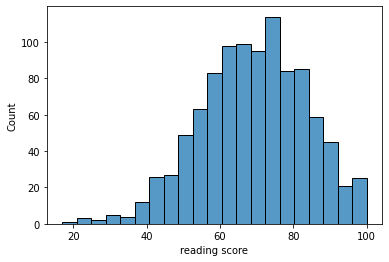

In [67]:
sns.histplot(data=df,x='reading score')